# Library Module - Crossref API

Welcome! In this module, we'll be introducing you to the online computing environment of Jupyter Notebooks, and giving an introduction to the Crossref API.


## Table of Contents
[1. Introduction](#1)
   - [1.1 Installing Packages](#1.1)
   - [1.2 Introduction to Jupyter Notebook](#1.2)
       - running cells, editing the notebook
   - [1.3 Introduction to Python](#1.3)
   
[2. Analysis using Crossref API](#2)
   - [2.1 What is Crossref?](#2.1)
   - [2.2 Packages for Crossref](#2.2)
   - [2.3 Exploring the Data](#2.3)
   - [2.4 Keys, Indexes, Metadata](#2.4)
   - [2.5 Creating tables](#2.5)
   - [2.6 Searches](#2.6)
   
[3. Visualization](#3)
   - [3.1 Grouping and Sorting by Journal](#3.1)
        - this is 3,4 in outline
   - [3.2 Bar Charts](#3.2)
       - this covers 1, 2 in the outline
   - [3.3 Citations](#3.3)
        - 5, 6, 7, 8 in outline
   - [3.4 Queries over Time](#3.4)
       - covers part 9
       
[4. Conclusion](#4)
   
[Bibliography](#4)


# Introduction <a id = '1'></a>

Welcome to the notebook! This notebook is an introduction to Python and the CrossRef API, giving us access to over 80 million journal articles.

# Learning Outcomes
**By the end of this notebook, students should be able to:**
- Use scaffolded Python code in the provided Jupyter notebook template to make Crossref subject and author queries
- Extract reference information from Crossref query results
- Visualize Crossref query results in bar plots and line plots. Interpret distributions and trends over time found in results
- Compare results from two different keyword queries	
- Explore/Discover new research directions

# 1.1 Installing Packages <a id = '1.1'></a>

There is a lot of code that exists out there that other people have written, and packages are a way for us to use their code without having to rewrite it. In the cell below, we install some packages that will be useful to us as we expore the Crossref API.

In [1]:
# just run this cell

# !pip install habanero
import habanero
from habanero import Crossref # our Crossref API
from collections import Counter # for easy counting
import ast # for string to dictionary conversion
import pandas as pd # for data manipulation
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 

# 1.2 Introduction to Jupyter Notebook <a id = '1.2'></a>
Running Cells, Editing the Notebook

Jyputer notebooks are a type of online interactive computing environment composed of code and text cells. Notebooks contain a mixture of markdown and code cells to break down the activity into more manageable pieces.


### Creating Cells
To add a cell to the notebook, click the "+" in the top left area right under "File". 

Within a cell, you have the option to write code, create a heading, or write text. To select an option, click on the "Code" button, located on the same row as "+". You will see a menu of options to choose from. 


Markdown - use for text
<br>
Code - use for running code
<br>
Heading - use for titles

### Deleting Cells
To delete a cell, click on the cell, and click the **scissors** icon to the right of the "+".

### Saving Your Work
To save your work, click on "File", then "Save and Checkpoint". If you have a Mac, you can click **"Command + S"**. 

For this notebook, you only need to know how to run, edit and create cells. However, for more assistance with navigating Jupyter Notebook, click on the **keyboard** icon next to the cell drop-down menu.

For more help, here's a great cheat sheet: https://i.pinimg.com/originals/f5/7e/07/f57e074be4503a39f6d9d8d15f0e8aa5.png

# Introduction to Python <a id = '1.3'></a>
Python is a programming language applied very frequently in data science. In the first part of this notebook, we will give a brief overview of Python.

### Variables
A name that is used to denote something or a value is called a `variable`. In python, variables can be declared and values can be assigned to them. Values can include numbers and strings. Run the code below:

In [2]:
x = 5
y = 2
hi = "Hello World"

Because the above cell ran, we've now officially assigned the variables to values. Run the cell (Shift + Enter) below to see the output of `x`, `hi`, and `print (x+y)`. Running the cell tells our computer to treat those symbols as the given values. If you didn't run the cell above, python wouldn't recognize the variables below.

In [3]:
x

5

In [4]:
hi

'Hello World'

In [5]:
print (x + y)

7


# 2. Analysis using Crossref API <a id = '2'></a>
The main goal of this notebook is to give an introduction to Crossref. In the sections below, we walk through the basics of Crossref

# 2.1 What is Crossref? <a id = '2.1'></a>

Crossref is a non-profit organization that helps to provides access to scientific literature. According to their [website itself](https://www.crossref.org/), Crossref "makes research outputs easy to find, cite, link, and assess". 

Crossref data on scientific publications essentially consists of three elements:
<br>
    1) Metadata about a publication
    <br>
    2) A URL link to the article
    <br>
    3) A document identifier (doi)
    <br>
    
At present Crossref contains information on 80 million scientific publications including articles, books and book chapters.

Data can be accessed using the python packages `habanero`, `crossrefapi`, and `crossref-commons`. In this module, we'll be focusing on the functionality of the **habanero** package. 

# 2.2 Packages for Crossref <a id = '2.2'></a>

When importing a package into Jupyter Notebook, we use the command `pip install ...` to download a package into Jupyter Notebook. 

We then use the command `import (package name)` to use our new package in our code. 

In [6]:
!pip install habanero

In [7]:
#To use Crossref API in Python, we need to import the habanero package
import habanero
from habanero import Crossref

# 2.3 Exploring the Data <a id = '2.3'></a>
In the cells below, we walk through using Crossref and exploring the data it gives us. To create an object that takes on the Crossref identity, we assign it to the variable `cr`.

In [8]:
cr = Crossref() # create a crossref object

The main function we will use is called `cr.works()`. This function takes in a query name. As an example, we'll use the search term "kenya". In order to save this output, we'll assign it to the variable name `kenya`.

In [9]:
# query for the term "kenya"
kenya = cr.works(query = "kenya")

If we inpspect `kenya`, we can see that it is a dictionary.

In [10]:
type(kenya)

dict

In [11]:
kenya

{'status': 'ok',
 'message-type': 'work-list',
 'message-version': '1.0.0',
 'message': {'facets': {},
  'total-results': 42232,
  'items': [{'indexed': {'date-parts': [[2019, 11, 24]],
     'date-time': '2019-11-24T10:48:27Z',
     'timestamp': 1574592507823},
    'reference-count': 0,
    'publisher': 'Centro Internacional de Agricultura Tropical',
    'issue': '1',
    'content-domain': {'domain': [], 'crossmark-restriction': False},
    'short-container-title': ['Trop Grass - Forr Trop'],
    'DOI': '10.17138/tgft(2)100-102',
    'type': 'journal-article',
    'created': {'date-parts': [[2015, 4, 1]],
     'date-time': '2015-04-01T20:32:16Z',
     'timestamp': 1427920336000},
    'page': '100',
    'source': 'Crossref',
    'is-referenced-by-count': 0,
    'title': ['Production of giant Panicum in semi-arid Kenya'],
    'prefix': '10.17138',
    'volume': '2',
    'author': [{'given': 'Donald M.G.',
      'family': 'Njarui',
      'sequence': 'first',
      'affiliation': []},
    

In the cell below, try creating your own query for a different search term. Make sure to save it to a variable! For now, limit your search term to a single word.

In [ ]:
# your query here
query = cr.works(query = "...")

In [32]:
# example
query = cr.works(query='berkeley')

 # 2.4 Keys, Indexes, Metadata <a id = '2.4'></a>
 A dictionary is a type of data structure that is indexed by keys. A dictionary contains key-value pairs, and we can access the values by calling on the keys. In our `kenya` dictionary, we can inspect the keys and take a look at the values that it contains.

In [13]:
list(kenya.keys())

['status', 'message-type', 'message-version', 'message']

Above, we can see that there are 4 different keys in our `kenya` dictionary. Let's see what the values are for each of the keys. In the cells below, we are accessing the values by *indexing* into the dictionary by the given keys.

In [14]:
kenya['status']

'ok'

In [15]:
kenya['message-type']

'work-list'

In [16]:
kenya['message-version']

'1.0.0'

In [17]:
kenya['message']

{'facets': {},
 'total-results': 42232,
 'items': [{'indexed': {'date-parts': [[2019, 11, 24]],
    'date-time': '2019-11-24T10:48:27Z',
    'timestamp': 1574592507823},
   'reference-count': 0,
   'publisher': 'Centro Internacional de Agricultura Tropical',
   'issue': '1',
   'content-domain': {'domain': [], 'crossmark-restriction': False},
   'short-container-title': ['Trop Grass - Forr Trop'],
   'DOI': '10.17138/tgft(2)100-102',
   'type': 'journal-article',
   'created': {'date-parts': [[2015, 4, 1]],
    'date-time': '2015-04-01T20:32:16Z',
    'timestamp': 1427920336000},
   'page': '100',
   'source': 'Crossref',
   'is-referenced-by-count': 0,
   'title': ['Production of giant Panicum in semi-arid Kenya'],
   'prefix': '10.17138',
   'volume': '2',
   'author': [{'given': 'Donald M.G.',
     'family': 'Njarui',
     'sequence': 'first',
     'affiliation': []},
    {'given': 'Mwangi',
     'family': 'Gatheru',
     'sequence': 'additional',
     'affiliation': []},
    {'give

This dictionary is nested, meaning that we can have keys that lead to values which are more dictionaries. It seems like the `message` contains most of the information we're interested in. Below, take a look at the keys of the `message` component of the `kenya` dictionary.

In [18]:
list(kenya['message'].keys()) # keys of the kenya message dictionary

['facets', 'total-results', 'items', 'items-per-page', 'query']

Just as we did before, we can inspect what information is contained for each key of the dictionary.

In [19]:
kenya['message']['facets'] # there are no facets; it's an empty set

{}

In [20]:
# This tells us the total number of results from our query
kenya['message']['total-results']

42232

In [21]:
kenya['message']['items-per-page'] # tells us how many items per page 

20

In [22]:
kenya['message']['query'] # details about our query

{'start-index': 0, 'search-terms': 'kenya'}

In [23]:
kenya['message']['items'] # the items of our query

[{'indexed': {'date-parts': [[2019, 11, 24]],
   'date-time': '2019-11-24T10:48:27Z',
   'timestamp': 1574592507823},
  'reference-count': 0,
  'publisher': 'Centro Internacional de Agricultura Tropical',
  'issue': '1',
  'content-domain': {'domain': [], 'crossmark-restriction': False},
  'short-container-title': ['Trop Grass - Forr Trop'],
  'DOI': '10.17138/tgft(2)100-102',
  'type': 'journal-article',
  'created': {'date-parts': [[2015, 4, 1]],
   'date-time': '2015-04-01T20:32:16Z',
   'timestamp': 1427920336000},
  'page': '100',
  'source': 'Crossref',
  'is-referenced-by-count': 0,
  'title': ['Production of giant Panicum in semi-arid Kenya'],
  'prefix': '10.17138',
  'volume': '2',
  'author': [{'given': 'Donald M.G.',
    'family': 'Njarui',
    'sequence': 'first',
    'affiliation': []},
   {'given': 'Mwangi',
    'family': 'Gatheru',
    'sequence': 'additional',
    'affiliation': []},
   {'given': 'David M.',
    'family': 'Mwangi',
    'sequence': 'additional',
    'af

Above, we can see that the `items` contains the majority of information about our query on Kenya. It contains a list of all of the results - we can check this with the `type` command we used earlier. Since we only are looking at the first page, our items list has only 20 items in it.

In [24]:
type(kenya['message']['items'])

list

In [25]:
len(kenya['message']['items'])

20

# 2.5 Creating Tables <a id = '2.5'></a>
When our data exists in dictionaries, it's a little hard to explore and manipulate. In order to tackle this, we'll create a dataframe of the information so that we can access it more easily.

In [26]:
df_kenya = pd.DataFrame(kenya['message']['items'])
df_kenya.head() # show the first 5 rows

,indexed,reference-count,publisher,issue,content-domain,short-container-title,DOI,type,created,page,...,link,editor,ISBN,original-title,abstract,license,update-policy,subtitle,assertion,institution
0,"{'date-parts': [[2019, 11, 24]], 'date-time': ...",0,Centro Internacional de Agricultura Tropical,1,"{'domain': [], 'crossmark-restriction': False}",[Trop Grass - Forr Trop],10.17138/tgft(2)100-102,journal-article,"{'date-parts': [[2015, 4, 1]], 'date-time': '2...",100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2019, 11, 23]], 'date-time': ...",0,"Nature Kenya, East Africa Natural History Soci...",NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,10.5962/bhl.title.87589,monograph,"{'date-parts': [[2014, 8, 24]], 'date-time': '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date-parts': [[2020, 3, 24]], 'date-time': '...",0,De Gruyter,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,10.1515/9783110826050-068,book-chapter,"{'date-parts': [[2019, 2, 25]], 'date-time': '...",304-305,...,[{'URL': 'http://www.degruyter.com/view/books/...,"[{'given': 'Werner', 'family': 'Schuder', 'seq...",[9783110826050],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date-parts': [[2020, 3, 30]], 'date-time': '...",0,International Journal Of Advanced Research,2,"{'domain': [], 'crossmark-restriction': False}",[IJAR],10.21474/ijar01/6544,journal-article,"{'date-parts': [[2018, 3, 30]], 'date-time': '...",1195-1203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2020, 3, 24]], 'date-time': '...",0,Commonwealth Secretariat,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,10.14217/9781848594371-12-en,component,"{'date-parts': [[2016, 1, 29]], 'date-time': '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a bunch of columns in our table, and we can't see all of them by scrolling. Below, we can look at a list of the columns instead.

In [27]:
df_kenya.columns

Index(['indexed', 'reference-count', 'publisher', 'issue', 'content-domain',
       'short-container-title', 'DOI', 'type', 'created', 'page', 'source',
       'is-referenced-by-count', 'title', 'prefix', 'volume', 'author',
       'member', 'published-online', 'container-title', 'language',
       'deposited', 'score', 'issued', 'references-count', 'journal-issue',
       'alternative-id', 'URL', 'ISSN', 'issn-type', 'publisher-location',
       'published-print', 'isbn-type', 'link', 'editor', 'ISBN',
       'original-title', 'abstract', 'license', 'update-policy', 'subtitle',
       'assertion', 'institution'],
      dtype='object')

We want to be able to retrieve more data from CrossRef. A single CrossRef query can return up to 1,000 results, and since our query has over 42,000 total results, we'd need to make 43 queries. Remember at the beginning, we only had 20 results since we only grabbed the first page. The CrossRef API permits fetching results from multiple pages, so by setting `cursor` to `*` and `cursor_max` to 1000 we can grab 1000 queries at once. Querying all 42,000 results would take a long time, so for the purposes of this demonstration we are only using 1000. If you have more time, you could query more results, but be aware that it will take a long time.

In [28]:
# this cell will take a while to run
cr_kenya = cr.works(query="kenya", cursor = "*", cursor_max = 1000, progress_bar = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:49<00:00,  1.01s/it]


We can check that we have the 1,000 messages, and indeed we do.

In [29]:
sum([len(k['message']['items']) for k in cr_kenya])

1000

Remember before, when you created your own search query? Here, we'll go through a few steps to get more results for your query. First, we'll check how many total results your query has. Run the cell below to find out.

In [33]:
query['message']['total-results']

27552

If there are fewer than 1000 results, then set `cursor_max` to the number of results. If there are more than 1000 results, set `cursor_max` to 1000 so that the code won't take too long to run. Be sure to fill in `query` with the same search term you used earlier.

In [ ]:
cr_query = cr.works(query="...", cursor = "*", cursor_max = 1000, progress_bar = True)

In [35]:
# example
cr_query = cr.works(query="berkeley", cursor = "*", cursor_max = 1000, progress_bar = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:51<00:00,  1.06s/it]


In order to get all of the different results from our Kenya query, we need to extract them from `cr_kenya`. Below, we create a list where each element is one result. `cr_kenya` is a list consisting of pages, where we have 20 results per page. So `cr_kenya` has 50 pages of 20 results each, giving us our 1000 results. In order to extract the info and have a list with each element be one results, we need to do some data manipulation.

In [45]:
len(cr_kenya)

50

In the cell below, we have 2 list comprehensions to get the results from our query. The first one creates a length 50 list that contains only the items instead of the entire dictionary, for each of the 50 pages. The second list comprehension extracts all of the items from the nested lists so that we have a single 1000 item list where each element is one result.

In [62]:
kenya_items = [k['message']['items'] for k in cr_kenya] # get items for all pages
kenya_items = [item for sublist in kenya_items for item in sublist] # restructure list

We'll do the same for your query results so that you can have some fun plotting later in the notebook. Just run the cell below.

In [63]:
query_items = [k['message']['items'] for k in cr_query] # get items for all pages
query_items = [item for sublist in query_items for item in sublist] # restructure list

# 2.6 Searches <a id = '2.6'></a>
You may be curious about the `cr.works` function that we've been using to get our data. This is the function that processes your topical "search". There are different arguments, and we've seen how changing these arguments can help us get more search results than just the first 20. 

Also, before we asked you to limit your search term to a single word. This is not a hard restriction - we simply did this for simplicity. You can query terms that are more specific and include more words - try it out below! Keep in mind that the more specifc your search query, the fewer results you may see. Feel free to play around with it.

In [53]:
query2 = cr.works(query = 'labrador retriever')
query2['message']['total-results']

7948

# 3. Visualization <a id = '3'></a>
Visualization is an important part of data analysis. Rather than looking at dictionaries and dataframes, we can see a visual summary of our data. In this section, we'll go over different types of visualizations we can make based off of the different data we have. We'll start by looking at the publishers. But first, we need to do some wrangling to get the data in a form that's useful for us.

# 3.1 Grouping and Sorting by Journal <a id = '3.1'></a>
Remember in [section 3.5](#3.5), we took our query results and converted them from a dictionary to a dataframe. Below, we will do this for our list of 1000 `kenya_items`, and then we can use the dataframe methods of grouping and sorting to get the counts of articles published by each publisher. We can also group by other columns, such as `type` or `language`.

In the cell below, we create a dataframe containing all 1000 of our Kenya query results.

In [119]:
kenya_df = pd.DataFrame(kenya_items)
kenya_df.head()

,indexed,reference-count,publisher,issue,license,content-domain,short-container-title,published-print,DOI,type,...,abstract,subtitle,publisher-location,isbn-type,event,ISBN,update-policy,article-number,editor,original-title
0,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",20,Elsevier BV,12,[{'URL': 'https://www.elsevier.com/tdm/userlic...,"{'domain': [], 'crossmark-restriction': False}",[The American Journal of Cardiology],"{'date-parts': [[2003, 12]]}",10.1016/j.amjcard.2003.08.043,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",0,Informa UK Limited,1-2,NaN,"{'domain': [], 'crossmark-restriction': False}","[Geografiska Annaler: Series A, Physical Geogr...","{'date-parts': [[1997, 4]]}",10.1111/j.0435-3676.1997.00010.x,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",0,Springer Science and Business Media LLC,4,"[{'URL': 'http://www.springer.com/tdm', 'start...","{'domain': [], 'crossmark-restriction': False}",NaN,"{'date-parts': [[2003, 10, 1]]}",10.1007/s10329-003-0051-y,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",0,Wiley,NaN,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[International Journal of Gynecology & Obstetr...,{'date-parts': [[2000]]},10.1016/s0020-7292(00)83178-1,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",4,Wiley,6,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[Plant Pathology],"{'date-parts': [[2003, 12]]}",10.1111/j.1365-3059.2003.00900.x,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While we are at it, we'll convert your search query items into a data frame as well. Adapt the code in the cell to create a dataframe out of your `query_items` list.

In [ ]:
query_df = pd.DataFrame(...)
query_df.head()

In [162]:
# example
query_df = pd.DataFrame(query_items)
query_df.head()

,indexed,reference-count,publisher,issue,content-domain,short-container-title,published-print,DOI,type,created,...,ISBN,subtitle,abstract,update-policy,assertion,archive,editor,article-number,funder,original-title
0,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",0,Springer Science and Business Media LLC,1,"{'domain': [], 'crossmark-restriction': False}",[Arch Sex Behav],"{'date-parts': [[2004, 2]]}",10.1023/b:aseb.0000007543.04004.9e,journal-article,"{'date-parts': [[2003, 12, 10]], 'date-time': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",0,Springer Science and Business Media LLC,1,"{'domain': [], 'crossmark-restriction': False}",[Journal of Community Health],"{'date-parts': [[2004, 2]]}",10.1023/b:johe.0000007529.46792.c5,journal-article,"{'date-parts': [[2003, 12, 10]], 'date-time': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",2,Springer Science and Business Media LLC,6967,"{'domain': [], 'crossmark-restriction': False}",[Nature],"{'date-parts': [[2003, 12]]}",10.1038/426591a,journal-article,"{'date-parts': [[2003, 12, 10]], 'date-time': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",0,University of Chicago Press,2,"{'domain': [], 'crossmark-restriction': False}",[American Journal of Sociology],"{'date-parts': [[2003, 9]]}",10.1086/381621,journal-article,"{'date-parts': [[2003, 12, 15]], 'date-time': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2019, 11, 18]], 'date-time': ...",0,University of Chicago Press,2,"{'domain': [], 'crossmark-restriction': False}",[American Journal of Sociology],"{'date-parts': [[2003, 9]]}",10.1086/381613,journal-article,"{'date-parts': [[2003, 12, 15]], 'date-time': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use grouping in our dataframe in order to get the counts of articles published by each journal. The `count()` argument gets us the counts for each publisher, and taking the column `'indexed'` gives us a single column containing the counts. Theoretically, we could take any of the columns, since they all contain the same values. We take the 'indexed' column, since it is not likely to have any missing values. The command `reset_index()` turns gives us back a dataframe instead of a series.

In [102]:
kenya_publisher_counts = kenya_df.groupby('publisher').count()['indexed'].reset_index()
kenya_publisher_counts = kenya_publisher_counts.rename({'indexed':'count'}, axis = 1) # rename counts column
kenya_publisher_counts

,publisher,count
0,ACM Press,1
1,AIP,1
2,AIP Publishing,2
3,ASME International,1
4,Akademiai Kiado Zrt.,1
5,American Association of Petroleum Geologists A...,4
6,American Chemical Society (ACS),1
7,American Geophysical Union (AGU),7
8,American Medical Association (AMA),10
9,American Physical Society (APS),1


The `kenya_publisher_counts` dataframe above shows us that we have 44 different publishers, and a lot of them published only a few articles. In order to see which publishers had the most articles, we can sort our dataframe by count.

In [104]:
sorted_kenya_publisher_counts = kenya_publisher_counts.sort_values(by='count', ascending = False)
sorted_kenya_publisher_counts

,publisher,count
17,Elsevier BV,239
38,Springer Science and Business Media LLC,213
44,Wiley,190
31,Oxford University Press (OUP),169
23,Informa UK Limited,43
16,Cambridge University Press (CUP),19
39,Test accounts,13
8,American Medical Association (AMA),10
35,SAGE Publications,9
43,University of Chicago Press,9


# 3.2 Bar Charts <a id = '3.2'></a>
Now that we have a sorted dataframe with publishers and the number of articles they each published on Kenya, we can use this dataframe to plot the publishers with the 10 highest counts.

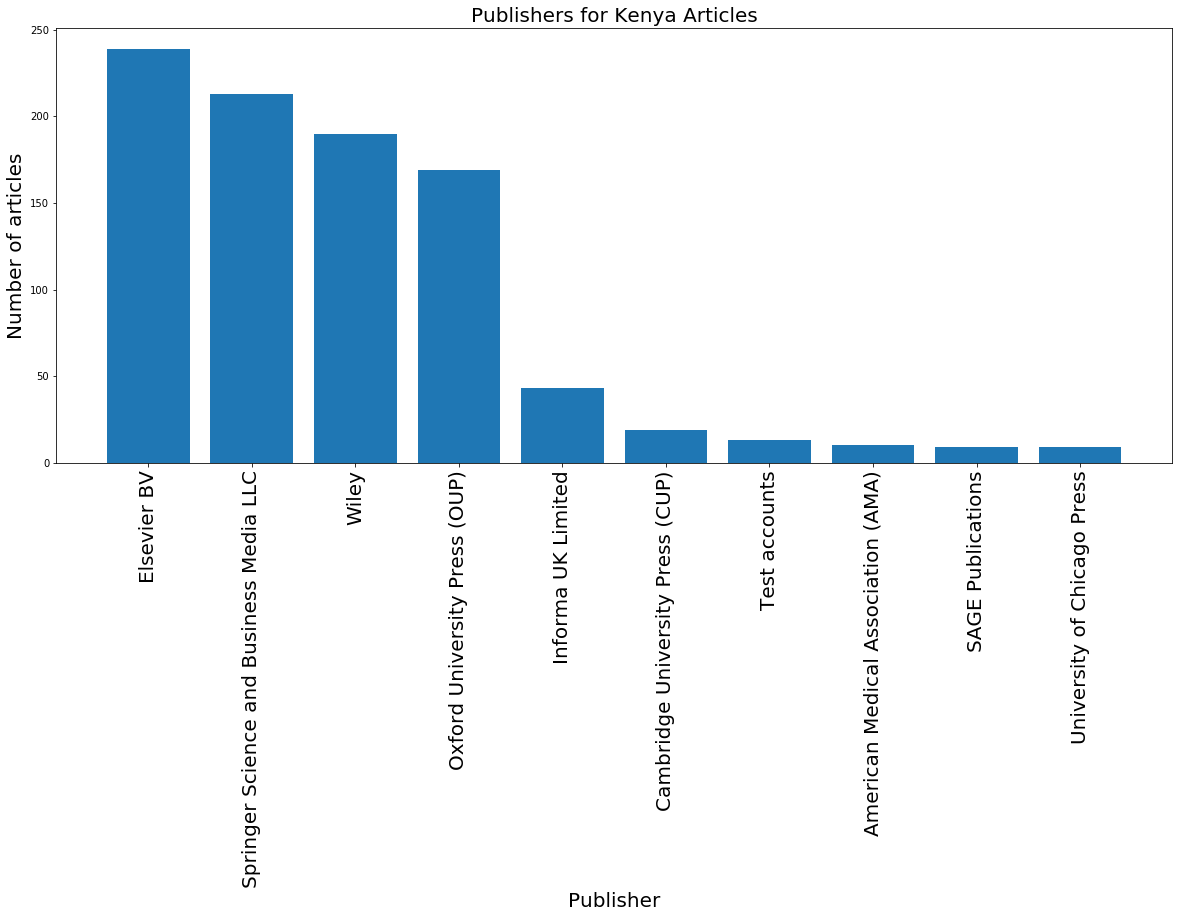

In [106]:
kenya_publishers_top10 = sorted_kenya_publisher_counts.head(10) # get first 10 publishers

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(kenya_publishers_top10['publisher'], kenya_publishers_top10['count']) 

# rotate publisher names for readability
plt.xticks(kenya_publishers_top10['publisher'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Publishers for Kenya Articles', fontsize = 20) # set title
plt.xlabel('Publisher', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

Before, we grouped by publisher. Keep in mind that we can group by other tags as well, such as type of article (`type`) or the language the article was published in (`language`). In the cell below, choose to group by either `type` or `language` and plot the resulting bar chart. Remember to sort your dataframe as well.

In [ ]:
# fill in the ...

counts = kenya_df.groupby('...').count()['indexed'].reset_index()
counts = counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_counts = counts.sort_values(by='count', ascending = False)
sorted_counts

In [ ]:
# fill in the ...

plt.figure(figsize=(20,8)) # set figure size

# create bar plot 
plt.bar(sorted_counts['...'], sorted_counts['count']) 

# rotate labels for readability
plt.xticks(sorted_counts['...'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('...', fontsize = 20) # set title
plt.xlabel('...', fontsize = 20) # set x label
plt.ylabel('...', fontsize = 20); # set y label

In [123]:
# types

kenya_type_counts = kenya_df.groupby('type').count()['indexed'].reset_index()
kenya_type_counts = kenya_type_counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_kenya_type_counts = kenya_type_counts.sort_values(by='count', ascending = False)
sorted_kenya_type_counts

,type,count
1,journal-article,977
3,proceedings-article,14
0,book,4
4,reference-book,4
2,monograph,1


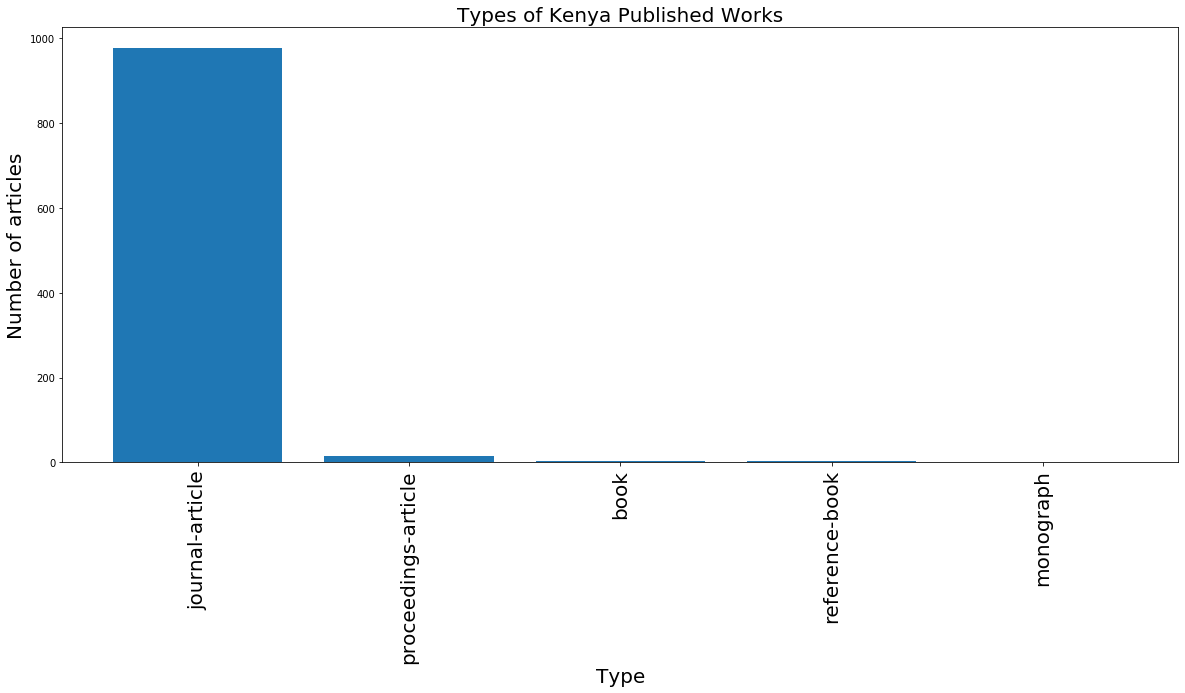

In [124]:
# types

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(sorted_kenya_type_counts['type'], sorted_kenya_type_counts['count']) 

# rotate publisher names for readability
plt.xticks(sorted_kenya_type_counts['type'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Types of Kenya Published Works', fontsize = 20) # set title
plt.xlabel('Type', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

In [125]:
# language

kenya_lang_counts = kenya_df.groupby('language').count()['indexed'].reset_index()
kenya_lang_counts = kenya_lang_counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_kenya_lang_counts = kenya_lang_counts.sort_values(by='count', ascending = False)
sorted_kenya_lang_counts

,language,count
1,en,948
0,de,3
2,fr,3


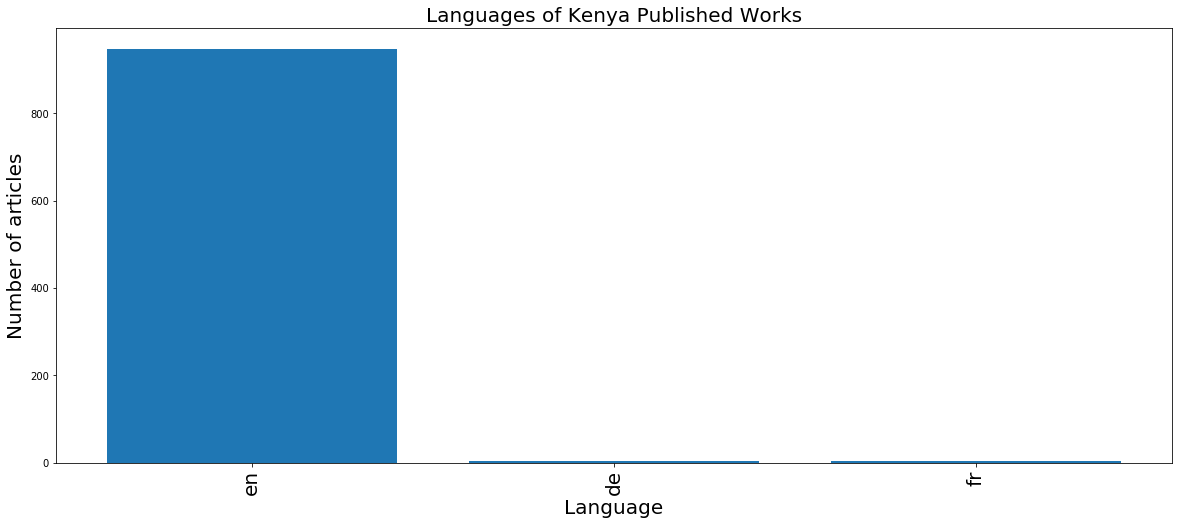

In [127]:
# languages

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(sorted_kenya_lang_counts['language'], sorted_kenya_lang_counts['count']) 

# rotate publisher names for readability
plt.xticks(sorted_kenya_lang_counts['language'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Languages of Kenya Published Works', fontsize = 20) # set title
plt.xlabel('Language', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

If you'd like, you can use the cell below to create bar charts of `publisher`, `language`, or `type` for your own query by grouping and sorting your `query_df` dataframe! Feel free to reference the cells above for an example with `kenya_df`.

In [ ]:
# your code here

# 3.3 Citations <a id = '3.3'></a>
In scientific literature, we are often also interested in the number of references a journal article has, or the number of times the article was cited. Let's see which articles have been cited the most - we can do this by sorting our dataframe by the `is-referenced-by-count` column. Our dataframe has 45 columns, but we'll just focus on a few. We'll look at the `title`, `is-referenced-by-count`, `publisher`, and `published-print` (the date it was published in print).

In [145]:
most_cited = kenya_df.sort_values('is-referenced-by-count', ascending=False)
most_cited = most_cited[['title', 'is-referenced-by-count', 'publisher', 'published-print']]
most_cited

,title,is-referenced-by-count,publisher,published-print
611,[2.5-Myr Australopithecus boisei from west of ...,208,Springer Science and Business Media LLC,"{'date-parts': [[1986, 8]]}"
716,[Changing patterns of orphan care due to the H...,161,Elsevier BV,"{'date-parts': [[2003, 7]]}"
369,[Quantitative assessment of regional pulmonary...,136,Wiley,"{'date-parts': [[2004, 9]]}"
593,[Microwear polishes on early stone tools from ...,122,Springer Science and Business Media LLC,"{'date-parts': [[1981, 10]]}"
720,"[Hemoglobin Kenya, the product of fusion of γ ...",115,Elsevier BV,"{'date-parts': [[1972, 12]]}"
...,...,...,...,...
196,"[Bulinus browni Jelnes, 1979 (Gastropoda: Plan...",0,Oxford University Press (OUP),"{'date-parts': [[1983, 1]]}"
471,[Moths and conservation values in East Africa:...,0,Springer Science and Business Media LLC,{'date-parts': [[2004]]}
192,[A disease resembling murine hepatitis in nude...,0,Oxford University Press (OUP),"{'date-parts': [[1976, 1]]}"
754,[Malaria in Kenya: elective report from clinic...,0,Elsevier BV,"{'date-parts': [[2004, 1]]}"


Let's look at the top 10 most cited articles.

In [146]:
most_cited.head(10)

,title,is-referenced-by-count,publisher,published-print
611,[2.5-Myr Australopithecus boisei from west of ...,208,Springer Science and Business Media LLC,"{'date-parts': [[1986, 8]]}"
716,[Changing patterns of orphan care due to the H...,161,Elsevier BV,"{'date-parts': [[2003, 7]]}"
369,[Quantitative assessment of regional pulmonary...,136,Wiley,"{'date-parts': [[2004, 9]]}"
593,[Microwear polishes on early stone tools from ...,122,Springer Science and Business Media LLC,"{'date-parts': [[1981, 10]]}"
720,"[Hemoglobin Kenya, the product of fusion of γ ...",115,Elsevier BV,"{'date-parts': [[1972, 12]]}"
597,[Palaeolimnology and archaeology of Holocene d...,113,Springer Science and Business Media LLC,"{'date-parts': [[1982, 8]]}"
33,[Patterns of coalition formation by adult fema...,112,Elsevier BV,"{'date-parts': [[2004, 3]]}"
231,[The reservoir of Plasmodium falciparum malari...,108,Oxford University Press (OUP),"{'date-parts': [[1992, 7]]}"
478,[The ecology of Lake Nakuru (Kenya)],106,Springer Science and Business Media LLC,{'date-parts': [[1978]]}
531,[The ecology of Lake Nakuru (Kenya)],105,Springer Science and Business Media LLC,"{'date-parts': [[1982, 10]]}"


**What is the most cited article, and when was it published? Do you think the publishing date has an effect on the number of times the article was referenced?** 

*Replace this line with your answer*

## Visualizing the Number of Citations
When looking at our `most_cited` table, we can see that the most number of times an article was referenced was 208, and the least was 0. Using a type of visualization called a histogram, we can look at the distribution of time an article was referenced. We'll do this in the cell below.

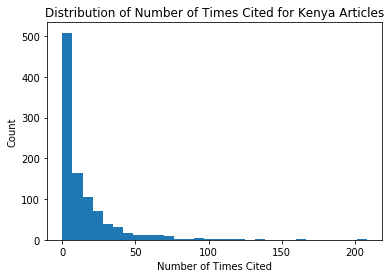

In [164]:
plt.hist(most_cited['is-referenced-by-count'], bins = 30) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Kenya Articles') # set title
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

We can see that this histogram is very skewed, with the majority of articles being cited fewer than 50 times. We can adjust the bins in order to see a better distribution, by specifying the sizes of the bins.

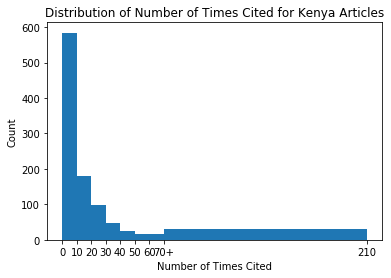

In [165]:
plt.hist(most_cited['is-referenced-by-count'], bins = [0, 10, 20, 30, 40, 50,60, 70, 210]) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Kenya Articles') # set title
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 210], [0, 10, 20, 30, 40, 50, 60, '70+', 210]) # set x axis tickmarks
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

In the cell below, we've provided code to at the number of times each article was cited for your `query_df`. In the following cell, try applying what you've just used to find the most cited article, the date it was published, and create a histogram showing the distribution for all articles.

In [166]:
most_cited_query = query_df.sort_values('is-referenced-by-count', ascending=False)
most_cited_query = most_cited_query[['title', 'is-referenced-by-count', 'publisher', 'published-print']]
most_cited_query

,title,is-referenced-by-count,publisher,published-print
576,[The registry of the international society for...,188,Elsevier BV,"{'date-parts': [[2003, 6]]}"
210,[The Registry of the International Society for...,187,Elsevier BV,"{'date-parts': [[2004, 7]]}"
801,[On the Biomimetic Design of the Berkeley Lowe...,107,IEEE,NaN
481,[Seroprevalence of HIV and risk behaviors amon...,85,American Medical Association (AMA),"{'date-parts': [[1994, 8, 10]]}"
577,[The registry of the international society for...,77,Elsevier BV,"{'date-parts': [[2003, 6]]}"
...,...,...,...,...
366,[P. Green (trans.): The Argonautika by Apollon...,0,Cambridge University Press (CUP),"{'date-parts': [[1999, 4]]}"
367,[K. J. G.: Poetic Garlands. Hellenistic Epigra...,0,Cambridge University Press (CUP),"{'date-parts': [[1999, 4]]}"
368,[D. W. Roller: The Building Program of Herod t...,0,Cambridge University Press (CUP),"{'date-parts': [[1999, 4]]}"
369,[G. Peers: Subtle Bodies. Representing Angels ...,0,Cambridge University Press (CUP),"{'date-parts': [[2002, 9]]}"


In [ ]:
# fill in the ...

plt.hist(...['is-referenced-by-count'], bins = ...) # generate histogram

# labeling
plt.title('...') # set title
plt.xlabel('...') # set x label
plt.ylabel('...'); # set y label

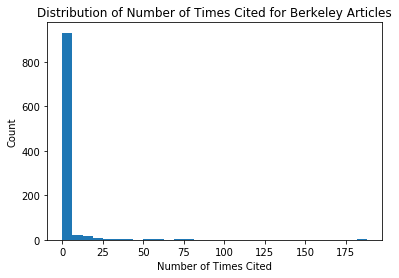

In [167]:
# example

plt.hist(most_cited_query['is-referenced-by-count'], bins = 30) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Berkeley Articles') # set title
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

# 3.4 Queries Over Time <a id = '3.4'></a>
For our last visualization, we will look at 2 queries over time. To expand our searches to 2 words, we will look at queries for permafrost melt and glacier melt, and look at the number of articles that were published by year. Since running queries takes a long time, and ideally we want to have more years to compare over time, we pre-ran the queries and saved the results into a csv which we'll load in the cell below.

The following 8 cells show the code we used to generate the csv files.

In [168]:
cr_permafrost = cr.works(query="permafrost melt", cursor = "*", cursor_max = 5000, progress_bar = True)

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [04:12<00:00,  1.02s/it]


In [169]:
permafrost_items = [k['message']['items'] for k in cr_permafrost] # get items for all pages
permafrost_items = [item for sublist in permafrost_items for item in sublist] # restructure list

In [171]:
permafrost_df = pd.DataFrame(permafrost_items)

In [173]:
permafrost_df.to_csv('permafrost_melt_5000.csv')

In [174]:
cr_glacier = cr.works(query="glacier melt", cursor = "*", cursor_max = 5000, progress_bar = True)

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [04:50<00:00,  1.16s/it]


In [175]:
glacier_items = [k['message']['items'] for k in cr_glacier] # get items for all pages
glacier_items = [item for sublist in glacier_items for item in sublist] # restructure list

In [176]:
glacier_df = pd.DataFrame(glacier_items)

In [178]:
glacier_df.to_csv('glacier_melt_5000.csv')

Below, we'll load in our query data and extract the year from the `created` column. Since we read in our data from a csv, our `created` column got converted to strings instead of dictionaries. We use the function `ast.literal_eval()` in order to convert the string back to a dictionary, and then access the year by indexing into `date-parts`.

In [180]:
glacier_df = pd.read_csv('glacier_melt_5000.csv')
permafrost_df = pd.read_csv('permafrost_melt_5000.csv')

In [198]:
glacier_years = [ast.literal_eval(k)['date-parts'][0][0] for k in glacier_df['created']] # extract year
permafrost_years = [ast.literal_eval(k)['date-parts'][0][0] for k in permafrost_df['created']] # extract year

In the cell below, we create a plot comparing the number of articles published for glacier melt and for permafrost melt per year. For `year_counts_glacier` and `year_counts_permafrost`, we use the python package `Counter` to return the counts of articles for each year. We sort by year so that our plot follows sequentially.

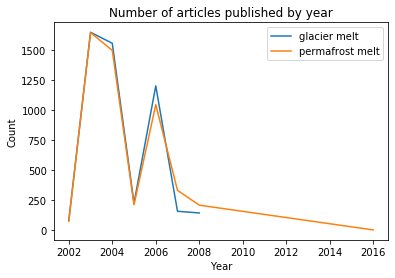

In [208]:
year_counts_glacier = dict(sorted((Counter(glacier_years)).items())) # create dictionary of glacier year counts
year_counts_permafrost = dict(sorted((Counter(permafrost_years)).items())) # create dictionary of permafrost year counts
plt.plot(list(year_counts_glacier.keys()),list(year_counts_glacier.values()), label = 'glacier melt')
plt.plot(list(year_counts_permafrost.keys()),list(year_counts_permafrost.values()), label = 'permafrost melt')
# plt.xticks(np.arange(2002, 2010))
plt.title('Number of articles published by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend();

We can see that our search results did not yield any articles for glacier melt that were published past 2008, but up until 2008, the number of articles for both topics were pretty similar. If you are interested, you could repeat the process of getting queries and edit the above code to compare two search terms that you are interested about.

# 4. Conclusion <a id = '4'></a>
That's it! Thanks for working through this notebook, and we hope you learned a bit more about how we can use python and Jupyter Notebooks in order to analyze academic journal entries. We did this through using the service Crossref, and the python package `habanero` which gives us acces to the Crossref API. We hope that you enjoyed this notebook!

# Bibliography <a id = '4'></a>
- Paul Oldham - Adapted CrossRef R guide to Python. https://poldham.github.io/abs/crossref.html#introduction

---

Notebook developed by: Keilyn Yuzuki, Anjali Unnithan

Data Science Modules: http://data.berkeley.edu/education/modules

Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings